Implementieren Sie selbst das Otsu-Verfahren (naive oder effiziente Implementierung,
das dürfen Sie entscheiden) und testen, dass es für die Binarisierung von Grauwertbildern
korrekte Ergebnisse liefert. Vergleichen Sie Ihre Ergebnisse mit denen der OpenCv-
Implementierung (cv.threshold(img, ..., cv.THRESH_BINARY+cv.THRESH_OTSU))

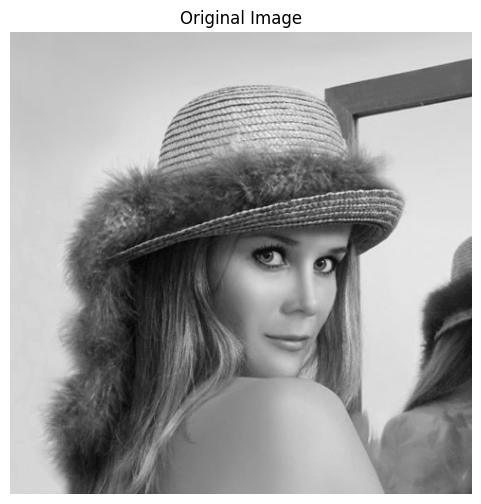

Naive Otsu Threshold: 145


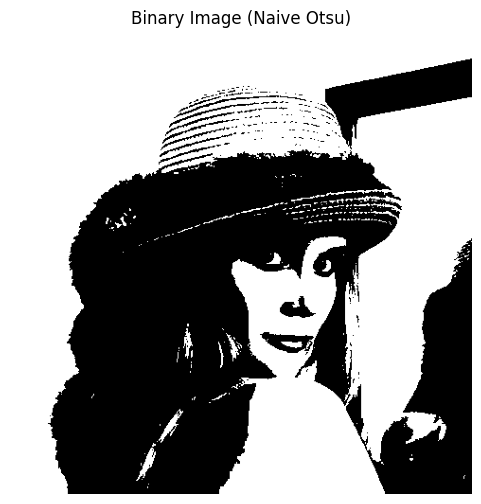

OpenCV Otsu Threshold: 144.0


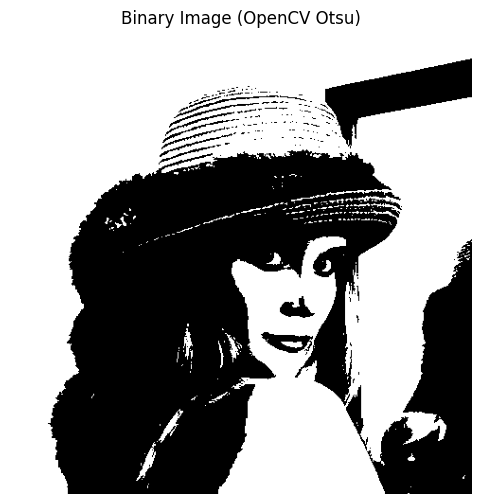

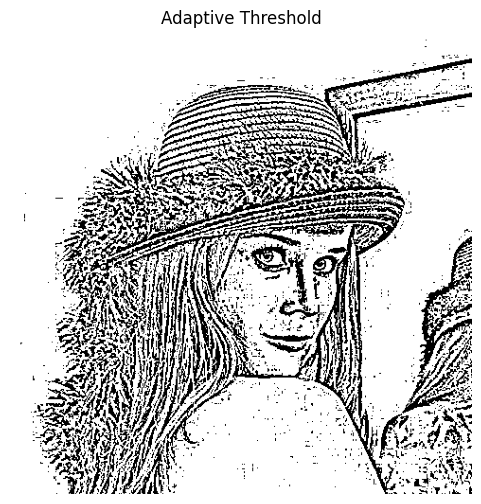

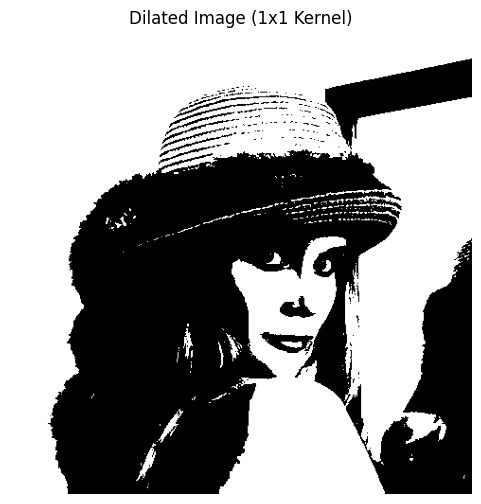

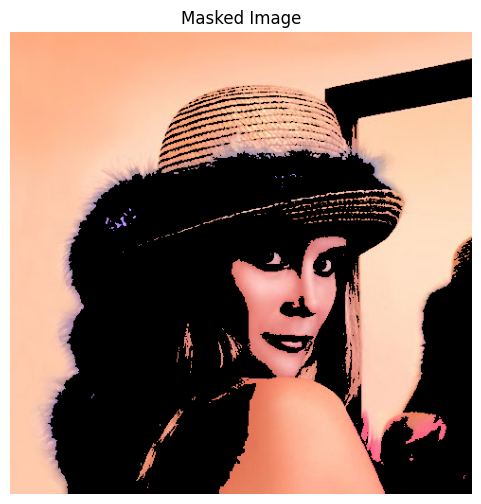

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Bild I einlesen
I = cv2.imread("Lena.jpg", cv2.IMREAD_GRAYSCALE)
color_image = cv2.imread("Lena.jpg")
# Convert color image from BGR to RGB for matplotlib display
color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

hist = cv2.calcHist([I], [0], None, [256], [0, 256])
hist = hist.flatten()  # Convert to 1D array

# Implementation of Otsu's method
def otsu_naive(hist):
    pixel_count = sum(hist)
    tMax = 0
    varMax = -1
    
    for t in range(1, 256):
        # Reset accumulators for each threshold t
        c0, c1 = 0, 0
        m0, m1 = 0, 0
        
        # Calculate class probabilities and means
        for i in range(t):
            c0 += hist[i]
            m0 += i * hist[i]
            
        for i in range(t, 256):
            c1 += hist[i]
            m1 += i * hist[i]
        
        # Avoid division by zero
        if c0 == 0 or c1 == 0:
            continue
            
        # Calculate means
        m0 = m0 / c0 if c0 > 0 else 0
        m1 = m1 / c1 if c1 > 0 else 0
        
        # Calculate weights
        w0 = c0 / pixel_count
        w1 = c1 / pixel_count
        
        # Calculate between-class variance
        var = w0 * w1 * (m0 - m1) ** 2
        
        # Update threshold if variance is higher
        if var > varMax:
            varMax = var
            tMax = t
    
    return tMax

            
# Show the original image
plt.figure(figsize=(6, 6))
plt.imshow(I, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Calculate Otsu's threshold using the naive implementation
threshold_naive = otsu_naive(hist)
print(f"Naive Otsu Threshold: {threshold_naive}")

# Apply thresholding using the naive result
ret_naive, binary_image_naive = cv2.threshold(I, threshold_naive, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(6, 6))
plt.imshow(binary_image_naive, cmap='gray')
plt.title('Binary Image (Naive Otsu)')
plt.axis('off')
plt.show()

# Otsu's thresholding using OpenCV
ret_cv, thr_cv = cv2.threshold(I, 0, 255, cv2.THRESH_OTSU)
print(f"OpenCV Otsu Threshold: {ret_cv}") # ret_cv holds the threshold value
plt.figure(figsize=(6, 6))
plt.imshow(thr_cv, cmap='gray')
plt.title('Binary Image (OpenCV Otsu)')
plt.axis('off')
plt.show()

# Adaptive thresholding
th3 = cv2.adaptiveThreshold(I,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
plt.figure(figsize=(6, 6))
plt.imshow(th3, cmap='gray')
plt.title('Adaptive Threshold')
plt.axis('off')
plt.show()


# Morphological operations (using the naive result)
kernel1 = np.ones((1, 1), np.uint8)
kernel2 = np.ones((2, 2), np.uint8)
kernel3 = np.ones((3, 3), np.uint8)

dilated1 = cv2.dilate(binary_image_naive, kernel1, iterations=1)
dilated2 = cv2.dilate(binary_image_naive, kernel2, iterations=1)
dilated3 = cv2.dilate(binary_image_naive, kernel3, iterations=1)

# Show the dilated image
plt.figure(figsize=(6, 6))
plt.imshow(dilated1, cmap='gray')
plt.title('Dilated Image (1x1 Kernel)')
plt.axis('off')
plt.show()

# plt.figure(figsize=(6, 6))
# plt.imshow(dilated2, cmap='gray')
# plt.title('Dilated Image (2x2 Kernel)')
# plt.axis('off')
# plt.show()

# plt.figure(figsize=(6, 6))
# plt.imshow(dilated3, cmap='gray')
# plt.title('Dilated Image (3x3 Kernel)')
# plt.axis('off')
# plt.show()


# Erosion, masking original image with binary image (using the naive result)
masked_image = cv2.bitwise_or(color_image, color_image, mask=binary_image_naive)
# Convert masked image from BGR to RGB for matplotlib display
masked_image_rgb = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(masked_image_rgb)
plt.title('Masked Image')
plt.axis('off')
plt.show()
